### Изучение информации

In [1]:
#вызов библиотеки Pandas
import pandas as pd

In [2]:
#исследование объявлений о продаже квартир
research_flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
research_flats.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#просмотр сводной информации о наборе данных в таблице
print(research_flats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

#### Анализ первых строк таблицы с данными выявил следующее:
1. Колонка first_day_exposition "Дата публикации" содержит трудно понимаемые значения. Необходимо преобразовать значения в формат даты.
---
2. Колонка locality_name "Название населенного пункта" содержит составные значения с разным регистром букв. Необходимо привести все значения к одному виду - нижний регистр букв, а также лемматизировать значения колонки. 
---
3. Возможно в таблице присутствуют дублирующие значения (визуальный анализ первых и последних строк дублирования не выявил). Необходимо сделать проверку на поиск дубликаторов по всем колонкам таблицы. В случае выявления дубликатов - удалить их.

#### Анализ сводной информации о наборе данных в таблице выявил следующее:
1. Таблица содержит 22 колонки и 23699 строк
---
2. Таблица содержит 2 колонки с типом bool (булевы значения), 14 колонок с типом  float64 (вещественные числа), 3 колонки с типом int64 (целые числа), 3 колонки с типом object (строка)
---
3. Колонка first_day_exposition "Дата публикации" имеет тип - object. Для дальнейших операций со значениями колонки, необходимо преобразовать данные в формат даты - datetime.
---
4. Колонка floors_total "Всего этажей в доме" имеет тип - float64 (вещественные числа). Показатель "Количество этажей" целочисленный и не может принимать дробные значения. Необходимо преобразовать формат типа данных в int64 (целые числа).
---
5. Колонка balcony "Число балконов" имеет тип - float64 (вещественные числа). Показатель "Количество балконов" целочисленный и не может принимать дробные значения. Необходимо преобразовать формат типа данных в int64 (целые числа).
---
6. Колонка parks_around3000 "Число парков в радиусе 3 км" имеет тип - float64 (вещественные числа). Показатель "Число парков" целочисленный и не может принимать дробные значения. Необходимо преобразовать формат типа данных в int64 (целые числа).
---
7. Колонка ponds_around3000 "Число водоемов в радиусе 3 км" имеет тип - float64 (вещественные числа). Показатель "Число парков" целочисленный и не может принимать дробные значения. Необходимо преобразовать формат типа данных в int64 (целые числа).
---
8. Колонка days_exposition "Сколько дней было размещено объявление (от публикации до снятия)" имеет тип - float64 (вещественные числа). Количество дней - это целочисленный показатель и не может принимать дробные значения. Необходимо преобразовать формат типа данных в int64 (целые числа).
---
9. Следующие колонки содержат пропущенные значения:
   + locality_name "Название населенного пункта";
   + floors_total "Всего этажей в доме";
   + ceiling_height "Высота потолков (м)";
   + living_area "Жилая площадь (м2)";
   + is_apartment "Аппартаменты (булев массив)";
   + kitchen_area "Площадь кухни (м2)";
   + balcony "Число балконов";
   + airports_nearest "Расстояние до ближайшего аэропорта в метрах (м)";
   + cityCenters_nearest "Расстояние до центра города (м)";
   + parks_nearest "Расстояние до ближайшего парка (м)";
   + parks_around3000 "Число парков в радиусе 3 км";
   + ponds_around3000 "Число водоемов в радиусе 3 км";
   + ponds_nearest "Расстояние до ближайшего водоема (м)";
   + days_exposition "Сколько дней было размещено объявление (от публикации до снятия)".
---
10. В колонке "Высота потолков (м)" пропущенные значения вероятно связаны с ошибками указания данных, так как не существует помещений без высоты потолков. Из-за того, что значения колонки "Высота потолков (м)" разнятся (указаны и значение 0, и очень высокие значения), то сначала произведен расчет медианы по колонке, а замем все пропущенные значения заменены на ранее расчитанную медиану.
    + Возможная причина пропусков - ошибка ручного ввода данных.
---
11. В колонке "Число балконов" пропуски можно отнести на отсутствие балконов и заменить пропуски на 0. Возможная причина пропусков - отсутствие значения показателя.
---
12. В колонках "Жилая площадь (м2)" и "Площадь кухни (м2)" пропуски нельзя отнести на отсутствие значений, но подходящей замены (среднее значение, медиана или площадь, равная жилой) произвести не представляется возможным. Заменим пропуски в указанных колонках на 0.
    + Возможная причина пропусков - ошибка ручного ввода данных.
---
13. В колонке "Аппартаменты (булев массив)" пропуски можно отнести на отсутствие значения, то пустое значение свидетельствует что запись не относится к аппартаментам. Заменим все пропуски на False. 
    + Возможнвые причины пропусков - отсутствие значения показателя или ошибка ручного ввода данных.
---
14. В колонке "Всего этажей в доме" пропуски можно отнести на отсутствие значения. Нельзя менять пропуски на 0 в тех записях, где указано значение в колонке "Этаж". Все пропуски в колонке "Всего этажей в доме" заменим на значения колонки "Этаж" по соответствующим строкам с пропусками.
    + Возможная причина пропусков - ошибка ручного ввода данных.
---
15. В колонке "Название населенного пункта" пропуски нельзя отнести на отсутствие значений, но подходящей замены (подмена на аналогичное значение) произвести не представляется возможным. Все строки с пропусками в указанной колонке - удаляем. 
    + Возможная причина пропусков - ошибка ручного ввода данных.
---
16. В колонках:
    + "Расстояние до ближайшего аэропорта в метрах (м)"
    + "Расстояние до центра города (м)" 
    + "Расстояние до ближайшего парка (м)"
    + "Число парков в радиусе 3 км"
    + "Число водоемов в радиусе 3 км"
    + "Расстояние до ближайшего водоема (м)" 
    
    содержатся информативные значения показателей, которые могут влиять на стоимость квартиры. В указанных колонках сразу заменить пропуски на 0 нельзя. Возможная причина пропусков - отсутствие информации (значения показателей не часто встречаются и расчитываются).

### Обработка данных

In [4]:
#Замена пропусков в колонке "Высота потолков (м)"
research_flats['ceiling_height'] = research_flats['ceiling_height'].fillna(0)

# Замена пропусков в колонке  "Число балконов"
research_flats['balcony'] = research_flats['balcony'].fillna(0)

# Замена пропусков в колонке  "Жилая площадь (м2)"
research_flats['living_area'] = research_flats['living_area'].fillna(0)

# Замена пропусков в колонке  "Аппартаменты (булев массив)"
research_flats['is_apartment'] = research_flats['is_apartment'].fillna(False)

# Замена пропусков в колонке  "Площадь кухни (м2)"
research_flats['kitchen_area'] = research_flats['kitchen_area'].fillna(0)

# Замена пропусков в колонке  "Всего этажей в доме"
research_flats['floors_total'] = research_flats['floors_total'].fillna(research_flats['floor'])

In [5]:
#Все строки с пропусками в колонке "Название населенного пункта" удаляем
research_flats.dropna(subset=['locality_name'], inplace = True)

In [6]:
# Импорт библитеки pymystem3 с лемматизацией на русском языке:
from pymystem3 import Mystem
m = Mystem()

In [7]:
#Лемматизация значений колонки "Название населенного пункта"
def lemma_locality_name(text):
    city= ['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 
           'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 
           'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 
           'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 
           'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 
           'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 
           'Приозерск', 'Пушкин', 'Светогорск', 'Сертолово', 'Сестрорецк', 
           'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург']
    if text in city:
            return 'город'
    if text == 'Санкт-Петербург':
            return 'столица'
    lemmas = m.lemmatize(text)
    for lemma in lemmas:
        if lemma in ['городской','городского']:
            return 'городской поселок'
        if lemma == 'коттеджный':
            return 'коттеджный поселок'
        if lemma in ['поселок','посёлок']:
            return 'поселок'
        if lemma in ['садовый','садоводческий']:
            return 'садовое товарищество'
        if lemma == 'село':
            return 'село'
        if lemma == 'деревня':
            return 'деревня'
        else:
            return lemma

# Типы населенных пунктов
research_flats['type_locality_name']=research_flats['locality_name'].apply(lemma_locality_name)
research_flats.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,столица
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,0.00,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,0.00,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,столица
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,0.00,14.0,0.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,столица
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,столица


In [8]:
for row in set(research_flats['locality_name']):
    # По каждой из нижеперечисленных колонок производимся расчет медианы
    #"Расстояние до ближайшего аэропорта в метрах (м)", 
    #"Расстояние до центра города (м)"
    #"Расстояние до ближайшего парка (м)"
    #"Число парков в радиусе 3 км"
    #"Число водоемов в радиусе 3 км"
    #"Расстояние до ближайшего водоема (м)"
    # в разрезе значений колонки "Название населенного пункта"
    # и подменяем пропуски на расчитанную медиану
    median_airports_nearest = research_flats[research_flats['locality_name'] == row]['airports_nearest'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'airports_nearest'] = research_flats[research_flats['locality_name'] == row]['airports_nearest'].fillna(median_airports_nearest)
    median_cityCenters_nearest = research_flats[research_flats['locality_name'] == row]['cityCenters_nearest'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'cityCenters_nearest'] = research_flats[research_flats['locality_name'] == row]['cityCenters_nearest'].fillna(median_cityCenters_nearest)
    median_parks_nearest = research_flats[research_flats['locality_name'] == row]['parks_nearest'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'parks_nearest'] = research_flats[research_flats['locality_name'] == row]['parks_nearest'].fillna(median_parks_nearest)
    median_ponds_around3000 = research_flats[research_flats['locality_name'] == row]['ponds_around3000'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'ponds_around3000'] = research_flats[research_flats['locality_name'] == row]['ponds_around3000'].fillna(median_ponds_around3000)
    median_ponds_nearest = research_flats[research_flats['locality_name'] == row]['ponds_nearest'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'ponds_nearest'] = research_flats[research_flats['locality_name'] == row]['ponds_nearest'].fillna(median_ponds_nearest)
    median_parks_around3000 = research_flats[research_flats['locality_name'] == row]['parks_around3000'].median()
    research_flats.loc[research_flats['locality_name'] == row , 'parks_around3000'] = research_flats[research_flats['locality_name'] == row]['parks_around3000'].fillna(median_parks_around3000)
# Если в группировке по насленному пункту 
# значения соответствующей колонки не найдены (все пусто), то меняем пропуски на 0.   
research_flats['airports_nearest'] = research_flats['airports_nearest'].fillna(0)
research_flats['cityCenters_nearest'] = research_flats['cityCenters_nearest'].fillna(0)
research_flats['parks_nearest'] = research_flats['parks_nearest'].fillna(0)
research_flats['ponds_around3000'] = research_flats['ponds_around3000'].fillna(0)
research_flats['ponds_nearest'] = research_flats['ponds_nearest'].fillna(0)
research_flats['parks_around3000'] = research_flats['parks_around3000'].fillna(0)
research_flats['days_exposition'] = research_flats['days_exposition'].fillna(0)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
#Замена типов данных
#в колонке "Дата публикации" с преобразованием к виду ГГГГ.ММ.ДД
research_flats['first_day_exposition']= pd.to_datetime(research_flats['first_day_exposition'], format='%Y.%m.%d')

#в колонке "Всего этажей в доме"
research_flats['floors_total'] = research_flats['floors_total'].astype('int')

#в колонке "Число балконов"
research_flats['balcony'] = research_flats['balcony'].astype('int')

#в колонке "Число парков в радиусе 3 км"
research_flats['parks_around3000'] = research_flats['parks_around3000'].astype('int')

#в колонке "Число водоемов в радиусе 3 км"
research_flats['ponds_around3000'] = research_flats['ponds_around3000'].astype('int')

#в колонке "Сколько дней было размещено объявление (от публикации до снятия)"
research_flats['days_exposition'] = research_flats['days_exposition'].astype('int')

### Вывод 
1. Все значения колонки "Название населенного пункта" лемматизированы. Также значения колонки "Название населенного пункта" разделены на 2 группы значений: "Наименование населенного пункта" и "Тип населенного пункта" для дальнешего анализа значений.
---
2. Произведено заполнение пропусков на значение 0 в следующих колонках:
    + "Высота потолков (м)";
    + "Число балконов";
    + "Жилая площадь (м2)";
    + "Аппартаменты (булев массив)";
    + "Площадь кухни (м2)";
    + "Всего этажей в доме".
    При дальнейшем анализе необходимо учитывать, что замененные на 0 пропуски - это нереальные значения и не использовать их в анализе.
---
3. Все строки с пропусками в колонке "Все строки с пропусками в колонке" удалены.
---
4. В разрезе значений колонки "Название населенного пункта" проанализированы пропуски в колонках:  
    + "Расстояние до ближайшего аэропорта в метрах (м)";
    + "Расстояние до центра города (м)";
    + "Расстояние до ближайшего парка (м)";
    + "Число парков в радиусе 3 км";
    + "Число водоемов в радиусе 3 км";
    + "Расстояние до ближайшего водоема (м)".
    
    Для каждой вышеуказанной колонки в разрезе каждого значения колонки "Название населенного пункта" расчитывается медиана и пропуски подменяются расчитанной медианой. Если в группировке по насленному пункту значения соответствующей колонки не найдены (все пусто), то меняем пропуски на 0.  
---
5. Произведена замена типа данных в следующих колонках:
    + В колонке "Дата публикации" тип данных изменен на формат datetime и значение приведено к виду - ГГГГ.ММ.ДД. Изменение формата связано с тем, что в дальнешем понадобиться анализ по дням недели, месяцам и годам. Данный анализ можно произвести только с форматом данных - дата.
    + В колонках: "Всего этажей в доме", "Число балконов", "Число парков в радиусе 3 км", "Число водоемов в радиусе 3 км", "Сколько дней было размещено объявление (от публикации до снятия)" тип данных изменен на формат целого числа. Изменение формата на целочисленный формат связано с тем, что в дальнешем понадобиться анализ данных количественных показателей и действия возможны только с целыми числами.

In [10]:
#Расчет цены квадратного метра
research_flats['price_per_square'] = research_flats['last_price'] / research_flats['total_area']

In [11]:
#Расчет дня недели публикования объявления
research_flats['weekday'] = research_flats['first_day_exposition'].dt.dayofweek

#Расчет месяца публикования объявления
research_flats['month'] = research_flats['first_day_exposition'].dt.month

#Расчет года публикования объявления
research_flats['year'] = research_flats['first_day_exposition'].dt.year

In [12]:
#Расчет соотношения жилой к общей площади
research_flats['liv_total'] = research_flats['living_area'] / research_flats['total_area']

In [13]:
#Расчет соотношения площади кухни к общей
research_flats['kitch_total'] = research_flats['kitchen_area'] / research_flats['total_area']

In [14]:
#Расчет этажа, на котором расположена квартира
def floor_group(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
research_flats['type_floor']=research_flats.apply(floor_group, axis=1)  

In [15]:
#Просмотр ранее добавленных показателей-колонок
research_flats.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,type_locality_name,price_per_square,weekday,month,year,liv_total,kitch_total,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,столица,120370.370370,3,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,0.00,11,18.6,1,False,...,584.5,81,поселок,82920.792079,1,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,False,...,574.0,558,столица,92785.714286,3,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,0.0,9,False,...,234.0,424,столица,408176.100629,4,7,2015,0.000000,0.000000,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,столица,100000.000000,1,6,2018,0.320000,0.410000,другой


#### Вывод
Расчитаны и добавлены в таблицу research_flats (Таблица с данными объявлений о продаже квартир) отдельными колонками следующие показатели:
1. Цена квадратного метра (колонка price_per_square);
2. Неделя, месяц и год публикации объявления (соответствующие колонки: weekday, month, year);
3. Соотношение жилой к общей площади (колонка liv_total);
4. Соотношение площади кухни к общей (колонка kitch_total);
5. Тип этажа квартиры (колонка type_floor).

### Исследовательский анализ

In [16]:
# Вызов библиотеки для создания графиков
import matplotlib.pyplot as plt

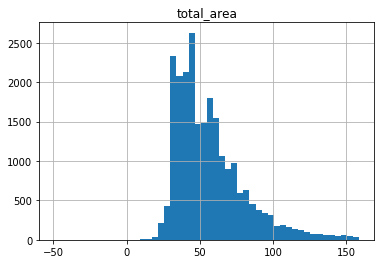

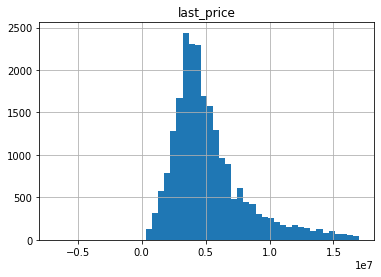

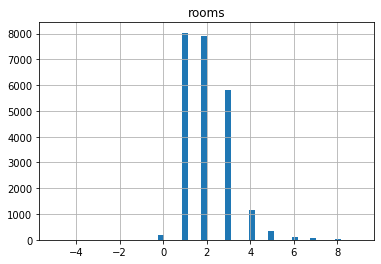

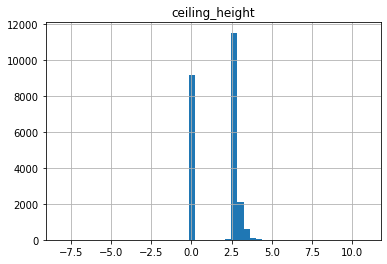

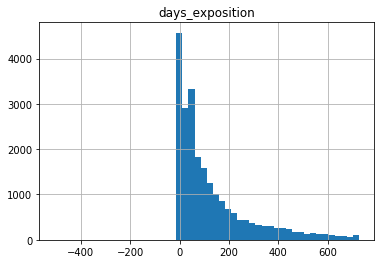

<Figure size 432x288 with 0 Axes>

In [17]:
cols = ['total_area','last_price','rooms','ceiling_height','days_exposition']
for col in range (len(cols)):
    Q1 = research_flats[cols[col]].quantile(q=0.25)
    Q3 = research_flats[cols[col]].quantile(q=0.75)
    IQR = Q3 - Q1
    research_flats[cols[col]].hist(bins = 50, range = (Q1-3*IQR, Q3+3*IQR))
    plt.title(cols[col])
    plt.figure()

#### Вывод
Анализируя построенные гистограммы для каждого показателя, было выявлено, что чаще всего в объявлениях о продаже встречаются:
   + квартиры с площадью 20-40 кв.м.;
   + цена квартир 3-4 млн. рублей;
   + квартиры с количеством комнат 1-2;
   + высота потолков в квартире - 2,5 (на втором месте высота потолков - 0 м, но мы помним, что пропуски заполнили 0 и данное значение нельзя считать достоверными).
   + среднее количество дней размещения объявления до продажи  - до 50 дней (на первом месте количество дней - 0, но мы помним, что пропуски заполнили 0 и данное значение нельзя считать достоверными).
---
###### Итог: 
1. Чаще всего продаются небольшие 1-2 комнатные квартиры с площадью не больше 40 кв.м., высотой потолков - 2,5 м и количеством комнат до 2.
2. Цена квартиры 3-4 млн. рублей.
3. Среднее время продаж - 2,5 месяца. 

**Можно уверенно считать, что быстрыми продажами являются продажи небольших и недорогих квартир.** 

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


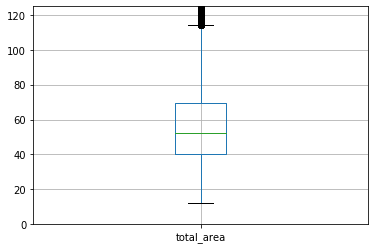

In [18]:
# Построим диаграмму размаха по значениям колонки "Площадь квартиры в квадратных метрах (м2)"
research_flats.boxplot('total_area')
plt.ylim(0, 125)
print(research_flats['total_area'].describe())

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


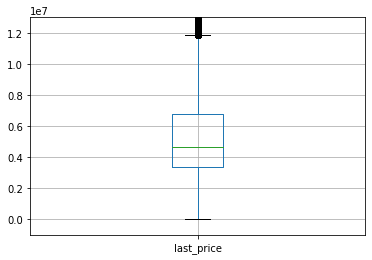

In [19]:
# Построим диаграмму размаха по значениям колонки "Цена на момент снятия публикации"
research_flats.boxplot('last_price')
plt.ylim(-1000000, 13000000)
print(research_flats['last_price'].describe())

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


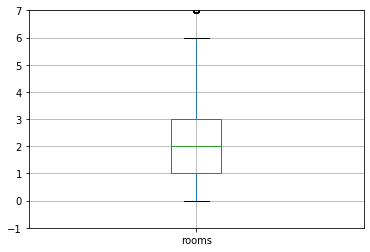

In [20]:
# Построим диаграмму размаха по значениям колонки "Число комнат"
research_flats.boxplot('rooms')
plt.ylim(-1, 7)
print(research_flats['rooms'].describe())

count    23650.000000
mean         1.697926
std          1.672632
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


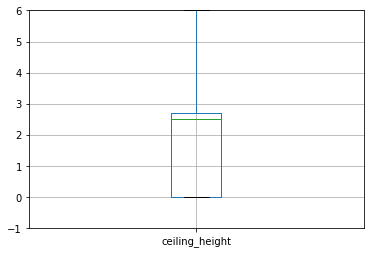

In [21]:
# Построим диаграмму размаха по значениям колонки "Высота потолков (м)"
research_flats.boxplot('ceiling_height')
plt.ylim(-1, 6)

print(research_flats['ceiling_height'].describe())

156.4489640591966
73.0
count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64


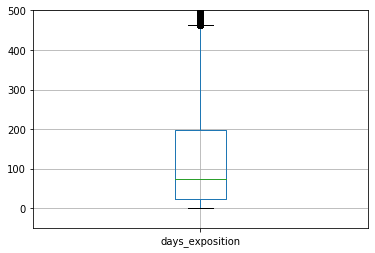

In [22]:
# Изучим значения колонки "Сколько дней было размещено объявление (от публикации до снятия)"
print(research_flats['days_exposition'].mean())
print(research_flats['days_exposition'].median())

research_flats.boxplot('days_exposition')
plt.ylim(-50, 500)
print(research_flats['days_exposition'].describe())

In [23]:
# Графики boxplot построены для определения выбросов в данных. Удалим выбросы по каждой из колонок, 
# для которых был построен boxplot: 
# "Площадь квартиры в квадратных метрах (м2)" 
research_flats.drop(research_flats[research_flats['total_area']<12].index, inplace = True)
research_flats.drop(research_flats[research_flats['total_area']>115].index, inplace = True)

# "Цена на момент снятия публикации"
research_flats.drop(research_flats[research_flats['last_price']>11900000].index, inplace = True)

# "Число комнат"
research_flats.drop(research_flats[research_flats['rooms']>6].index, inplace = True)

# "Высота потолков (м)" 
research_flats.drop(research_flats[research_flats['ceiling_height']>5.8].index, inplace = True)

# "Сколько дней было размещено объявление (от публикации до снятия)"
research_flats.drop(research_flats[research_flats['days_exposition']>460].index, inplace = True)

#### Вывод
1. По колонке "Площадь квартиры в квадратных метрах (м2)" выявлено:
    + среднее значение 60,33;
    + значение медианы 52;
    + диапазон редких и выбивающихся значений: меньше 12 и больше 115.
    Анализируя диаграмму разброса по колонке "Площадь квартиры в квадратных метрах (м2)" можно сказать, что площадь продаваемых квартир варьируется в диапазоне от 12 до 115 квадратных метров.
---    
2. По колонке "Цена на момент снятия публикации" выявлено:
    + среднее значение 6 541 127;
    + значение медианы 4 650 000;
    + диапазон редких и выбивающихся значений: больше 11 900 000.
    Анализируя диаграмму разброса по колонке "Цена на момент снятия публикации" можно сказать, что цена продаваемых квартир не превышает 11,9 млн. рублей.
---
3. По колонке "Число комнат" выявлено:
    + среднее значение 2,07;
    + значение медианы 2;
    + диапазон редких и выбивающихся значений: больше 6.
    Анализируя диаграмму разброса по колонке "Число комнат" можно сказать, что количество комнат продаваемых квартир, не превышает 6 комнат.
---
4. По колонке "Высота потолков (м)" выявлено:
    + среднее значение 1,65;
    + значение медианы 2,5;
    + диапазон редких и выбивающихся значений: больше 5,8.
    Анализируя диаграмму разброса по колонке "Высота потолков (м)" можно сказать, что высота потолков продаваемых квартир, не превышает 5,8 метров.
---
5. По колонке "Сколько дней было размещено объявление (от публикации до снятия)"
    + среднее значение 156,45;
    + значение медианы 73;
    + диапазон редких и выбивающихся значений: больше 460.
    Анализируя диаграмму разброса по колонке "Сколько дней было размещено объявление (от публикации до снятия)" можно сказать, что продажа обычно занимает от 22 до 198 дней. Быстрой можно считать продажу, занявшую меньше 22 дней. Долгой можно считать продажу свыше 198 дней.

In [24]:
# Импорт библиотеки Seaborn для построения графиков
import seaborn as sns

Коэффициент корреляции:  0.43265324746342926


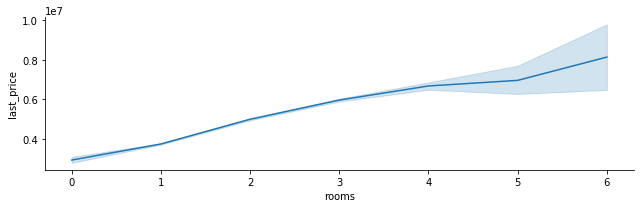

In [25]:
# График зависимости цены от количества комнат с использованием библиотеки Seaborn
sns.relplot(x="rooms", y="last_price", kind="line", data=research_flats, height=3, aspect=3)

# Расчет корреляции
print('Коэффициент корреляции: ', research_flats['rooms'].corr(research_flats['last_price']))

Коэффициент корреляции:  0.6933792513004177


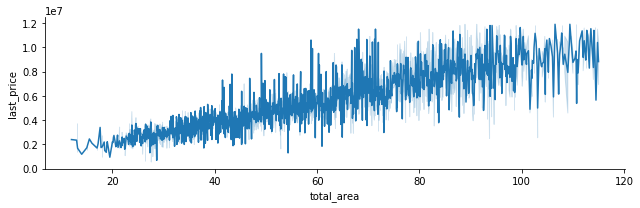

In [26]:
# График зависимости цены от квадратного метра с использованием библиотеки Seaborn
sns.relplot(x="total_area", y="last_price", kind="line", data=research_flats, height=3, aspect=3)

# Расчет корреляции
print('Коэффициент корреляции: ', research_flats['total_area'].corr(research_flats['last_price']))

Коэффициент корреляции:  0.11710441771010027


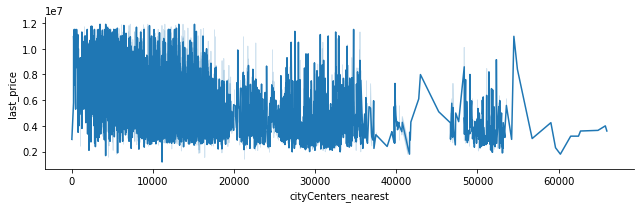

In [27]:
# График зависимости цены от расстояния до центра города с использованием библиотеки Seaborn
sns.relplot(x="cityCenters_nearest", y="last_price", kind="line", data=research_flats, height=3, aspect=3)

# Расчет корреляции
print('Коэффициент корреляции: ', research_flats['cityCenters_nearest'].corr(research_flats['last_price']))

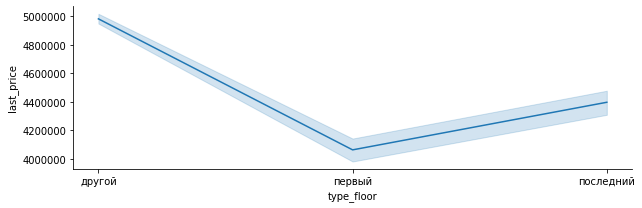

In [28]:
# График зависимости цены от типа этажа с использованием библиотеки Seaborn
sns.relplot(x="type_floor", y="last_price", kind="line", data=research_flats, height=3, aspect=3)

# Расчет корреляции для типа этажа не делаем, 
# так как цена - числовое значение, а тип этажа - текстовое

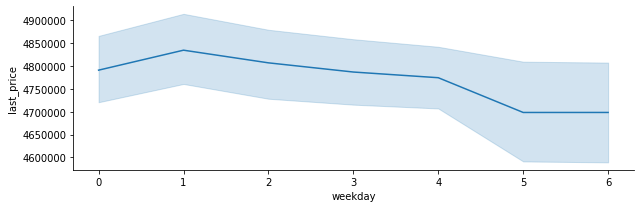

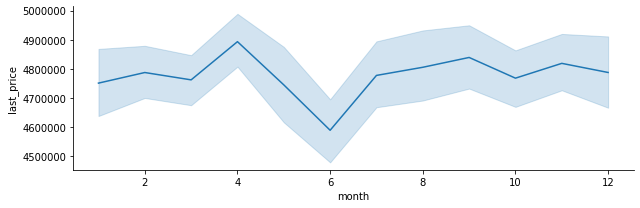

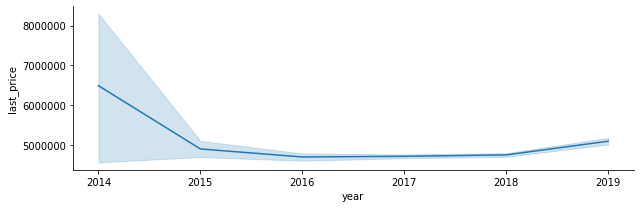

In [29]:
# График зависимости цены от дня недели/месяца/года размещения с использованием библиотеки Seaborn
sns.relplot(x="weekday", y="last_price", kind="line", data=research_flats, height=3, aspect=3)
sns.relplot(x="month", y="last_price", kind="line", data=research_flats, height=3, aspect=3)
sns.relplot(x="year", y="last_price", kind="line", data=research_flats, height=3, aspect=3)

#### Вывод
1. Увеличение цены от увеличения количество комнат в квартире наблюдается в пределах 1 млн. рублей
2. Самая большая цена на квартиры с 6 комнатами
3. Минимальная цена на квартиры  без комнат.
4. Коэфифициент корреляции (зависимость цены от количества комнат) свидетельствует о прямой зависимости показателей, но значение 0,44 говорит о слабой зависимости.
---
5. С увеличением квадратных метров (примерно 20 кв.м.) в квартире, наблюдается неравномерное увеличение ее цены в диапазоне от 2 до 4 млн.рублей.
6. Коэфифициент корреляции (зависимость цены от квадратных метров) свидетельствует о прямой зависимости показателей, но значение 0,70 говорит о средней зависимости.
---
7. В пределах 80 км от центра г. Санкт-Петербург, цена квартир распределяется неравномерно (от 2 до 12 млн. рублей).
    + в диапазоне от 0 до 2 км от центра наблюдается наибольшая цена на квартиры;
    + в пределах 2-2,5 км от центра стоимость квартир снижается на 2 млн. рублей;
    + в диапазоне от 2,5 до 3,5 кв от центра стоимость квартир возрастает от 2 до 11 млн. рублей;
    + от 3,5 км от центра и далее диапазон цен на квартиры составляет от 2 до 8 млн. рублей
8. Коэфифициент корреляции (зависимость цены от удаленности от центра г. Санкт-Петербург) свидетельствует о прямой зависимости показателей, но значение 0,12 говорит об очень слабой зависимости.
---
9. Минимальная цена на квартиры на первом этаже - 3,8 млн. рублей
10. Для последнего и других этажей разница в цене примерно 0,6 млн. рублей
---
11. В понедельник публиковались объявления с наибольшей ценой квартир - 4,84 млн. рублей , а в пятницу/субботу - с наименьшей ценой  квартир 4,7. Разница составляет 140 тыс.р. 
*Предположу, что основные решения о продаже квартир люди решают в выходные и следовательно в понедельник выставляют объявления.*
---
12. В апреле публиковались объявления с наибольшей ценой квартир - 4,89 млн. рублей, а в июне - с наименьшей ценой  квартир 4,59. Разница составляет 300 тыс.р.
*Предположу, что спад объявлений в июне связан с началом сезона отпусков.*
---
13. В 2014 году публиковались объявления с наибольшей ценой квартир - 6,5 млн. рублей, а в период с 2015 по 2018 год цены на квартиры упали в пределах 4,75 млн. рублей. С 2018 года вновь отмечается увеличение цен на квартиры и в 2019 году цена квартиры составляла 5,1 млн. рублей. 
*Предположу, что высокие цены в 2014 году связаны с проведением на территории Российской Федерации XXII Зимних Олимпийских игр в Сочи, а рост цен с 2018 года можно связать с проведением на территории Российской Федерации 21-го Чемпионата мира по футболу (Санкт-Петербург - "культурная столица" Российской Федерации и на время значимых событий в стране пользуется популярностью среди иностранных и российских туристов).*

         locality_name     level_1  count          mean
33     Санкт-Петербург  last_price  12526  5.597058e+06
32              Пушкин  last_price    308  5.299488e+06
290  посёлок Парголово  last_price    306  4.477276e+06
91     деревня Кудрово  last_price    263  4.228588e+06
320     посёлок Шушары  last_price    411  4.074859e+06
13             Колпино  last_price    315  3.800756e+06
3           Всеволожск  last_price    357  3.731193e+06
285     посёлок Мурино  last_price    481  3.627236e+06
6              Гатчина  last_price    275  3.426270e+06
4               Выборг  last_price    209  3.053086e+06


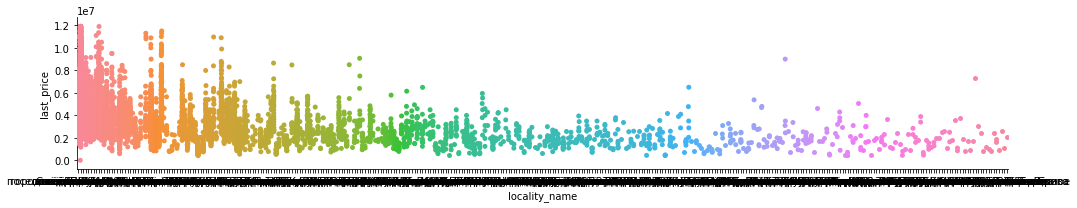

In [30]:
# Выбор 10 населенных пунктов с наибольшим числом объявлений
price_top10_city = research_flats.pivot_table(index = ['locality_name'], 
                            values='last_price', 
                            aggfunc=['count','mean']
                              ).stack().reset_index()
price_top10_city = price_top10_city.sort_values(by='count', ascending = False).head(10)
print(price_top10_city.sort_values(by='mean', ascending = False).head(10))

# График зависимости цены от расстояния до центра типа населенного пункта с использованием библиотеки Seaborn
sns.catplot(x="locality_name", y="last_price", data=research_flats, height=3, aspect=5)

#### Вывод
1. Самая высокая стоимость жилья в г. Санкт-Петербурге - 5,6 млн. рублей
2. Самая никная стоимость жилья в г. Выборг - 3,05 млн. рублей

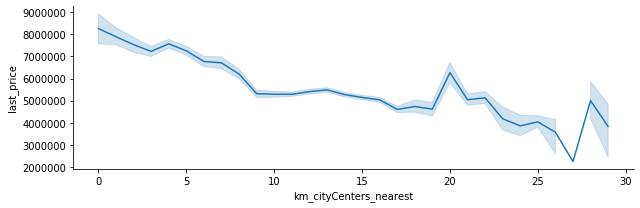

In [31]:
# Выделим квартиры в г. Санкт-Петербург
flats_SPB = research_flats[research_flats['locality_name']=='Санкт-Петербург'].reset_index()

# Расчитаем расстояние в киллометрах
flats_SPB['km_cityCenters_nearest'] = flats_SPB['cityCenters_nearest']/1000

# График зависимости цены от удаления от центра г. Санкт-Петербург с использованием библиотеки Seaborn
flats_SPB['km_cityCenters_nearest'] = flats_SPB['km_cityCenters_nearest'].astype('int')
sns.relplot(x="km_cityCenters_nearest", y="last_price", kind="line", data=flats_SPB, height=3, aspect=3)

#### Вывод 
1. Область, которая входит в Центр примерно 8 киллометров. 
2. С увеличением расстояния от центра и до 8 км, цена квартиры резко уменьшается (за исключением всплеска увеличения цены на 5 км от центра)
3. Далее 8 км от центра, стоимость квартир уменьшается более плавно

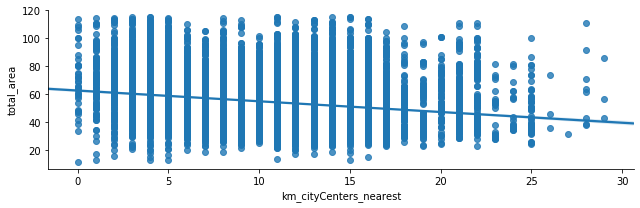

In [32]:
# График зависимости общей площади от удаленности в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="km_cityCenters_nearest", y="total_area", data=flats_SPB, height=3, aspect=3)

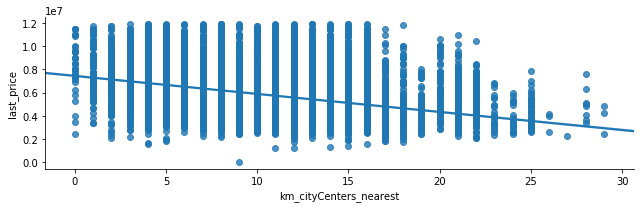

In [33]:
# График зависимостицены квартиры от удаленности в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="km_cityCenters_nearest", y="last_price", data=flats_SPB, height=3, aspect=3)

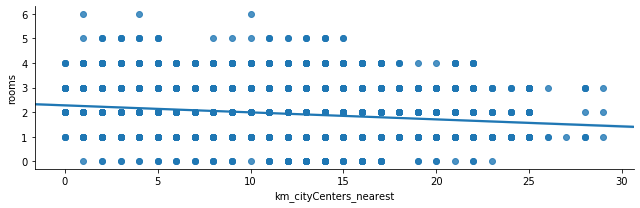

In [34]:
# График зависимости количества комнат от удаленности в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="km_cityCenters_nearest", y="rooms", data=flats_SPB, height=3, aspect=3)

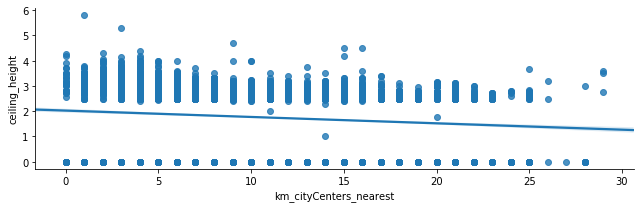

In [35]:
# График зависимости высоты потолков от удаленности в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="km_cityCenters_nearest", y="ceiling_height", data=flats_SPB, height=3, aspect=3)

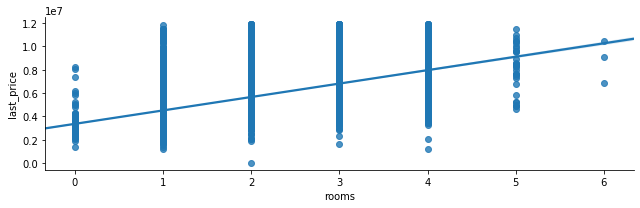

In [36]:
# График зависимости цены квартиры от количества комнат в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="rooms", y="last_price", data=flats_SPB, height=3, aspect=3)

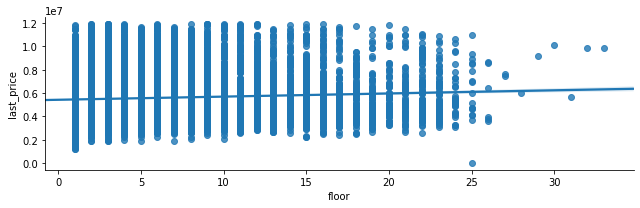

In [37]:
# График зависимости цены квартиры от этажа размещения в пределах центрального округа г. Санкт-Петербург
sns.lmplot(x="floor", y="last_price", data=flats_SPB, height=3, aspect=3)

     first_day_exposition     level_1  count     median
1014           2018-07-10  last_price     82  4637500.0
876            2018-02-20  last_price     65  4600000.0
738            2017-09-27  last_price     92  4450000.0
782            2017-11-10  last_price    208  4330000.0
857            2018-02-01  last_price    339  4300000.0
739            2017-09-28  last_price     66  4275000.0
845            2018-01-12  last_price     65  4040000.0
754            2017-10-13  last_price    113  3850000.0
890            2018-03-06  last_price     68  3672500.0
910            2018-03-26  last_price     84  3550000.0


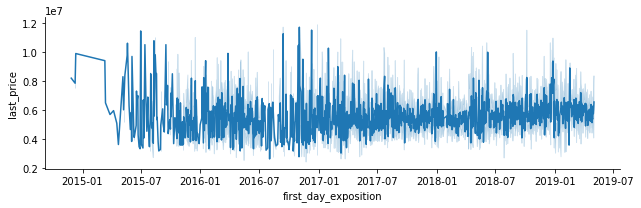

In [38]:
# Расчет зависимости цены квартиры от даты размещения в пределах центрального округа
price_of_days_exposition = research_flats.pivot_table(index = ['first_day_exposition'], 
                            values='last_price', 
                            aggfunc=['count','median']
                              ).stack().reset_index()
price_of_days_exposition = price_of_days_exposition.sort_values(by='count', ascending = False).head(10)
print(price_of_days_exposition.sort_values(by='median', ascending = False).head(10))


# График зависимости цены квартиры от даты размещения в пределах центрального округа
sns.relplot(x="first_day_exposition", y="last_price", kind="line", data=flats_SPB, height=3, aspect=3)

#### Вывод
1. При удалении от центральной области г. Санкт-Петербурга наблюдается уменьшение площади квартир примерно на 0,83 кв.м на удаление на 1 км от центральной области.
2. При удалении от центральной области г. Санкт-Петербурга наблюдается уменьшение цены продаваемых квартир примерно на 223 тыс. рублей за удаление на 1 км от центральной области.
3. При удалении от центральной области г. Санкт-Петербурга наблюдается уменьшение количество комнат в продаваемых квартирах примерно на 1 комнату в пределах 30 км от центра.
4. При удалении от центральной области г. Санкт-Петербурга наблюдается уменьшение высоты потолков в продаваемых квартирах примерно на 1 метр в пределах 30 км от центра.
5. При увеличении количества комнат наблюдается увеличение цены продаваемой квартиры примерно на 1,5 млн. рублей за увеление на 1 комнату.
6. При увеличении этажа размещения продаваемой квартиры наблюдается незначительное увеличение цены продаваемой квартиры примерно на 33 тыс. рублей при увеличени на 1 этаж.
8. По всем датам публикации средняя цена квартир 3-4 млн. рублей. Пик количества предложений о продажах квартир пришелся на конец 2017 - начало 2018 годов. С конца 2017 года опять наблюдается тендения увеличения количества объявлений о продаже квартир